# Додаткові завдання №4

## Задача 1.2.15
Нехай $\Omega = {1, 2, \ldots, 2n}$.
Всiм числам приписанi ймовiрностi, пропорцiйнi логарифмам цих чисел.
Знайти цi ймовiрностi.
Знайти ймовiрнiсть того, що в результатi експерименту з’явиться:
1. парне число;
2. непарне число.

### Завдання 1
Реалізуйте випадкову величину, описану в умові задачі, за допомогою класу [scipy.stats.rv_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html) в залежності від параметра $n$.

Створіть дві випадкові величини для:
- $n = 10$;
- $n = 25$.

    -- Desided that n is rather to be a parameter of a random value than to make a two separate random values for each n --


In [50]:
from scipy.stats import rv_discrete
import numpy as np
import matplotlib.pyplot as plt


class lg(rv_discrete):
    
    def rvs(n, size=1):
        res = np.zeros(size)
        xk = range(1, 2*n + 1)
        pk_ = np.array([np.log(x) for x in xk])
        factor = 1/sum(pk_)
        pk = factor * pk_
        evenProb = sum([pk[i] for i in range(0, 2*n, 2)])
        oddProb = sum([pk[i] for i in range(1, 2*n, 2)])
        omega = (1, -1)
        for i in range(size):
            cur = np.random.choice(omega, p=(evenProb, oddProb))
            res[i] = cur
        return res
        
    def pmf(k, n):
        xk = range(1, 2*n + 1)
        pk_ = np.array([np.log(x) for x in xk])
        factor = 1/sum(pk_)
        pk = factor * pk_
        evenProb = sum([pk[i] for i in range(0, 2*n, 2)])
        oddProb = sum([pk[i] for i in range(1, 2*n, 2)])
        omega = (1, -1)
        res = np.zeros(len(k))
        for i in range(len(k)):
            if k[i] == 1:
                res[i] = evenProb
            elif k[i] == -1:
                res[i] = oddProb
        return res        
        
    def cdf(k, n):
        xk = range(1, 2*n + 1)
        pk_ = np.array([np.log(x) for x in xk])
        factor = 1/sum(pk_)
        pk = factor * pk_
        evenProb = sum([pk[i] for i in range(0, 2*n, 2)])
        oddProb = sum([pk[i] for i in range(1, 2*n, 2)])
        omega = (1, -1)
        res = np.zeros(len(k))
        for i in range(len(k)):
            if k[i] < -1:
                res[i] = 0
            elif  -1 <= k[i] < 1:
                res[i] = oddProb
            elif k[i] >=1:
                res[i] = 1
        return res

### Завдання 2
Зобразіть графічно функцію щільності, функцію розподілу та гістограму $10000$ значень отриманої випадкової величини в залежності від параметра $n$:
- $n = 10$;
- $n = 25$.

3
6


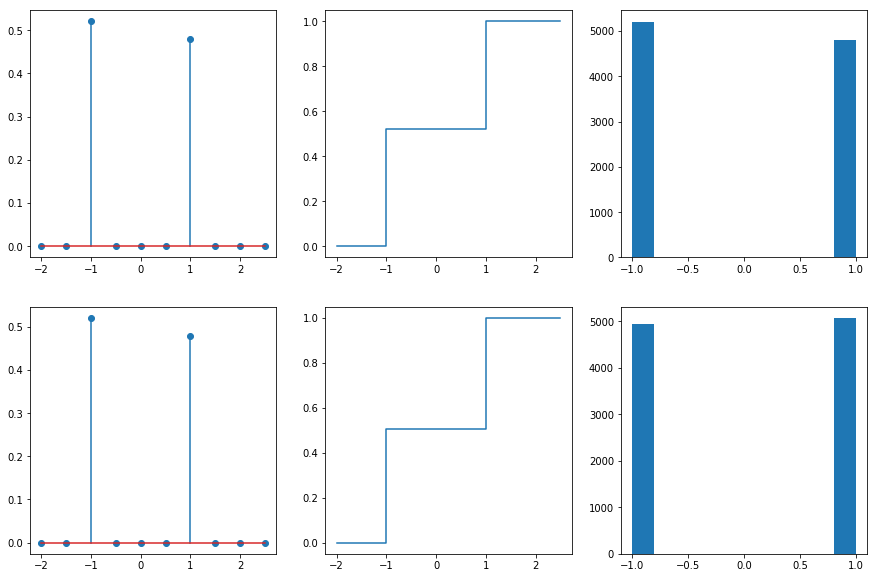

In [60]:
nVals = (10, 25)
plt.subplot(2, 3, 1)
x = np.arange(-2, 3, 0.5)

# plt.axis((-2, 2, -0.2, 1))

f = plt.gcf()
f.set_size_inches(15, 10)

intg = (i*3 for i in range(1, 3))
x = np.arange(-2, 3, 0.5)
for i, n in zip(intg, nVals):
    y1 = lg.pmf(x, n)
    y2 = lg.cdf(x, n)
    y3 = lg.rvs(n, size=10_000)
    plt.subplot(2, 3, i - 2)
    plt.stem(x, y)
    plt.subplot(2, 3, i - 1)
    plt.plot(x, y2, drawstyle='steps-post')
    plt.subplot(2, 3, i)
    plt.hist(y3)


### Завдання 3
Напишіть функцію для обрахунку теоретичної (через щільність отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [61]:
def theor(n):
    domain = (-1, 1)
    y = lg.pmf(domain, n)
    return y[0], y[1]


nVals = (10, 25)
for n in nVals:
    a, b = theor(n)
    print(f"n: {n}, odd number prob: {a}, even number prob: {b}")

n: 10, odd number prob: 0.5205046299279227, even number prob: 0.47949537007207715
n: 25, odd number prob: 0.5073640739858903, even number prob: 0.49263592601410955


### Завдання 4
Напишіть функцію для обрахунку еміричної (симулюванням $1000000$ значень отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [64]:
def empyric(n, amt):
    y = list(lg.rvs(n, size=amt))
    evenAmt = y.count(1)
    oddAmt = y.count(-1)
    return oddAmt/amt, evenAmt/amt
    

for n in (10, 25):
    a, b = empyric(n, 100_000)
    print(f"n: {n}, odd number prob: {a}, even number prob: {b}")


n: 10, odd number prob: 0.52223, even number prob: 0.47777
n: 25, odd number prob: 0.50721, even number prob: 0.49279
